# CSC421 Fall 2021 Assignment 3 
### Author: George Tzanetakis 

This notebook is based on the topics covered in **Chapter 12 - Quantifying Uncertainty **, **Chapter 13 Probabilistic Reasoning** from the book *Artificial Intelligence: A Modern Approach.*  You are welcome and actually it can be educational to look at the code at the aima-code repository as well as other code resources you can find on the web. However, make sure you understand any code that you incoporate. 

The assignment structure is as follows - each item is worth 1 point: 

1. Snakes and ladder simulation (Basic) - basic rolling and movement simulation, no ladders/snakes 
2. Snakes and ladder simulation (Basic) - multiple simulations and recording of number of rolls 
3. Snakes and ladder simulation (Expected) - adding of user-specified ladders/snakes 
4. Snakes and ladder simulation (Expected) - simulation to determine probability distribution of number of rolls 
5. Snakes and ladder simulation (Advanced) - exact inference + simulation with different ending rules 
6. Naive Bayes text classsification (Basic) - conditional probabilities for dictionary words 
7. Naive Bayes text classification (Basic) - markdown equations for Bernoulli 
8. Naive Bayes text classification (Expected) - prediction of movie review polarity 
9. Naive Bayes text classification (Expected) - classification accuracy and confusion matrix 
10. Naive Bayes text classification (Advanced) - probabilitistic generation of movie reviews 

The grading will be done in 0.5 increments. 1 point for correct answer, 0.5 points for partial or incorrect 
but reasonable answer and 0.0 for no answer or completely wrong answer. 


# Introduction 

This question uses the board game of snakes and ladders to explore the concepts behind probability, 
stochastic simulation as well as exact and approximate inference. I assume that most of you are familiar 
with snakes and ladders. If you need a refresher check the following link: 

https://www.ymimports.com/pages/how-to-play-snakes-and-ladders




# Question 1 (Basic)  - 1 point

Your first task will be to write a simple movement simulator on a snakes and ladders board. 
For this question you can ignore the snakes and ladders and just simply assume you only 
have to deal with moving. You will need to simulate rolling the die - this can be done 
by using the Python *random* module and the *randint* method. Your function *play_game* 
will take as input the length of the board (an integer), "play" the game by rolling the die 
multiple times until the sum of rolls is larger or equal to the length of the board.  (note: 
this is one of the possible and simplest end rules). The function should return the total 
number of rolls required to finish the the particular game that was played. Obviously 
this number will vary as it depends on the specific random rolls performed during the movement 
simulation. 






In [6]:
# YOUR CODE GOES HERE 
#Assumptions: None, straightforward question!

import random

def play_game(board_len):
    pos = 0
    roll_count = 0
    while (pos < board_len):
        die_roll = random.randint(1,6)
        #print("Current die roll: ", die_roll)
        pos += die_roll
        roll_count += 1
    return roll_count

print("The game took this many rolls: ",play_game(15))

The game took this many rolls:  6


# Question 2 (Basic) - 1 point

Your next task is to collect information about the probability distribution of number of rolls using the *play_game* function you implemented in the previous subquestion. Simulate playing the game 1000 times with a board length of 100 and record the number of rolls for each simulation. Show the histogram of the number of rolls for this simulation. You don't need to plot the histogram but can simply show the counts for each number of rolls as text. You can also create a plot using either the *matplotlib* or *bokeh* plotting frameworks. Make sure you include appropriate pip install and import statements in your notebook and check that it works in the Jupyterhub of the course. 



In [16]:
!pip install matplotlib

(array([  3.,  32., 150., 123., 272., 246.,  76.,  74.,  19.,   5.]),
 array([21. , 22.7, 24.4, 26.1, 27.8, 29.5, 31.2, 32.9, 34.6, 36.3, 38. ]),
 <BarContainer object of 10 artists>)

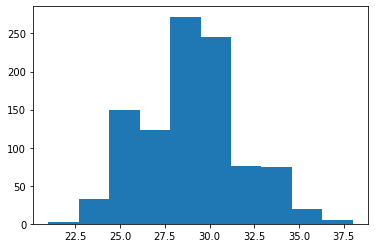

In [17]:
# YOUR CODE GOES HERE 
# Assumptions: Just displayed as a histogram
import matplotlib.pyplot as plt

roll_list = []
for i in range(1000):
    roll_list.append(play_game(100))
    #print(roll_list)
plt.hist(roll_list)


# Question 3 (Expected) 1 point 

Extent your *play_game* method to take as input a specification of snake and ladder positions and then perform the appropriate movement simulation. Just as before playing the game returns the number of rolls required to finish the game using the same simple end rule as the previous subquestions. 

<img src="snakes_ladders.png" width="50%"/>

The snake and ladders positions will be encoded as a list of tuples. If the first number of the tuple is smaller than the second one it is ladder otherwise it is a snake. For example two of the snakes and one of the ladders
in the board above would be represented as: 

In [18]:
snakeA = (34,6)
snakeB = (32,10)
ladderC = (1,38)
snake_ladder_list = [snakeA,snakeB,ladderC]
print(snake_ladder_list)

[(34, 6), (32, 10), (1, 38)]


Your play game function should take as input the snake and ladder specification. For testing and experiments use the board provided in the image above. 

In [19]:
# YOUR CODE GOES HERE 
# Assumptions: Always go from first snake/ladder value to second
# Snakes and ladders board is always set up the same way with size 100
snake1 = (32,10)
snake2 = (36,6)
snake3 = (48,26)
snake4 = (62,18)
snake5 = (88,24)
snake6 = (95, 56)
snake7 = (97, 78)
ladder1 = (1,38)
ladder2 = (4,14)
ladder3 = (8,30)
ladder4 = (21,42)
ladder5 = (28,76)
ladder6 = (50,67)
ladder7 = (71,92)
ladder8 = (80,99)
snakes_n_ladders = [snake1,snake2,snake3,snake4,snake5,snake6,snake7,
                    ladder1,ladder2,ladder3,ladder4,ladder5,ladder6,ladder7,ladder8]
#print(snakes_n_ladders)
def play_snl():
    board_size = 100
    position = 0
    num_rolls = 0
    while (position < board_size):
        curr_roll = random.randint(1,6)
        position += curr_roll
        #print("pos before sl = ", position)
        for sl in snakes_n_ladders:
            if (position in list(sl)):
                position = sl[1]
        num_rolls += 1
        #print("pos after SL = ", position)
    return(num_rolls)

print("Number of rolls: ",play_snl())

Number of rolls:  34


# QUESTION 4 (EXPECTED) - 1 point

Use the full game simulation that incoprorates the snakes and ladders, simulate 1000 games and record 
probability distribution of the number of rolls as a histogram similarly to the previous subquestion. 
Modify your code to support the following additional ending variations: 

* Exact landing: the piece needs to end exactly at the last square. If the roll exceeds the square then it is discarded but counted for the number of rolls 
* Bounce back variation:  If the roll is too high, the player's piece will bounce off the last space and move back. For example, if a player had four spaces to get to 100 and rolled a 6, the piece will move four spaces to 100, then “bounce back" two spaces to 98.


Show the histogram of the number of rolls for each ending variation. 

In [20]:
# YOUR CODE GOES HERE
# Assumptions: no input for play_snl_advanced is the simple rules of just passing 100
# Snakes and ladders board is always set up the same way with size 100

def play_snl_advanced(mode="default"):
    board_size = 100
    position = 0
    num_rolls = 0
    if (mode == "default"):
        while (position < board_size):
            curr_roll = random.randint(1,6)
            position += curr_roll
            for sl in snakes_n_ladders:
                if (position in list(sl)):
                    position = sl[1]
            num_rolls += 1
    elif (mode == "exact"):
        while (position < board_size):
            curr_roll = random.randint(1,6)
            if (position+curr_roll > board_size):
                num_rolls += 1
            else:
                position += curr_roll
                for sl in snakes_n_ladders:
                    if (position in list(sl)):
                        position = sl[1]
                num_rolls += 1
    elif (mode == "bounce"):
        while (position < board_size):
            curr_roll = random.randint(1,6)
            if (position+curr_roll > board_size):
                bounce_back = position+curr_roll-board_size
                position = board_size-bounce_back
                for sl in snakes_n_ladders:
                    if (position in list(sl)):
                        position = sl[1]
                num_rolls += 1
            else:
                position += curr_roll
                for sl in snakes_n_ladders:
                    if (position in list(sl)):
                        position = sl[1]
                num_rolls += 1
    else:
        print("Not a supported mode.")
    return(num_rolls)


print("No Rules Mode: ", play_snl_advanced())
print("Exact Final Mode: ", play_snl_advanced("exact"))
print("Bounce Back Mode: ", play_snl_advanced("bounce"))

No Rules Mode:  12
Exact Final Mode:  42
Bounce Back Mode:  59


Average:  34.042


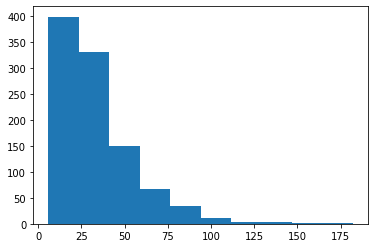

In [21]:
simple_games = []
for i in range(1000):
    simple_games.append(play_snl_advanced())
plt.hist(simple_games)
print("Average: ", sum(simple_games)/len(simple_games))

Average:  38.06


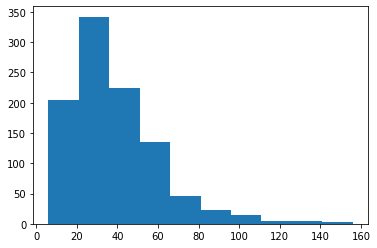

In [22]:
exact_games = []
for i in range(1000):
    exact_games.append(play_snl_advanced("exact"))
plt.hist(exact_games)
print("Average: ", sum(exact_games)/len(exact_games))

Average:  63.355


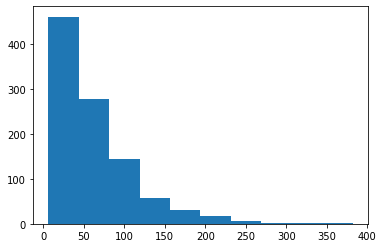

In [23]:
bounce_games = []
for i in range(1000):
    bounce_games.append(play_snl_advanced("bounce"))
plt.hist(bounce_games)
print("Average: ", sum(bounce_games)/len(bounce_games))

# QUESTION 5 (ADVANCED) - 1 point 

In this question the goal is to perform exact probabilistic inference for the number of rolls. Rather than simulating the game and recording the number of moves you will need to compute systematically the probabilities of every possible sequence of rolls. You should use the simplified version of board movement with no snakes and ladders and the simple landing rule. As an example let's consider a very short board of 4 squares. The only sequence of 1 roll that finishes the game is rolling a 4 which has $P(4) = 1/6$. For two rolls we have more possibilities such as 1,3 or 3,1 or 2,2 or 2,3 or 3,2 etc. For example the probability of (1,3) is $P(1,3) = 1/6 * 1/6$. Your code should systematically calculate the right products and sums to come up with probabilities for 
each possible number of rolls. To make this a bit simpler consider a board of length $25$. I advise that you first start by looking at very short boards and checking some of the calculations by hand. 

Compare the results you get from exact inference with the results you get from approximate inference for the same board length. 

In [24]:
# YOUR CODE GOES HERE 
# Assumptions: Recursion functions are commented out, but the output obtained is stored in the variable roll_dict
# Assuming that a roll sequence that reaches target with fewer rolls is not counted again in the larger roll's total

import pprint 

roll_dict = { 1:0, 2:0, 3:0, 4:0,
                5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0, 13:0, 14:0, 15:0, 
               16:0, 17:0, 18:0, 19:0, 20:0, 21:0, 22:0, 23:0, 24:0, 25:0}

sampling_dict = { 1:0, 2:0, 3:0, 4:0,
                5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0, 13:0, 14:0, 15:0, 
               16:0, 17:0, 18:0, 19:0, 20:0, 21:0, 22:0, 23:0, 24:0, 25:0}

def dice_adder(roll_goal, rolls_rem, roll_sum = 0):
    
    #base case
    if (rolls_rem == 0):
        if (roll_sum >= roll_goal):
            return 1
        return 0
    # check for previously completed sequences that occured in fewer rolls
    if (rolls_rem > 0 and roll_sum >= roll_goal):
        return 0
    
    
    #recursion
    # optimization by discarding sums that will never reach to target goal
    if (rolls_rem*6+roll_sum < roll_goal):
        return 0
    
    rolls_rem -= 1
    result = 0
    for i in range (1,7):
        result += dice_adder(roll_goal, rolls_rem, roll_sum+i)
    return result
    
    
def dice_prob_matrix(roll_goal):
    total_rolls = 0
    # i = remaining rolls in the dice_adder
    for i in range(1,roll_goal+1):
        roll_amount = dice_adder(roll_goal, i)
        #total_rolls += roll_amount
        roll_dict[i] = roll_amount
        print(i, ':', roll_amount)
        
            
# THE RECURSION FUNCTIONS ARE COMMENTED OUT SINCE THEY TAKE 14 MINUTES
#The new roll_dict below is the output that was generate by running dice_prob_matrix(25)

#dice_prob_matrix(25)
roll_dict = {1: 0, 2: 0, 3: 0, 4: 0, 5: 252, 6: 8092, 7: 82344, 8: 440541, 9: 1517758, 10: 3740418, 
             11: 7013136, 12: 10398986, 13: 12503964, 14: 12390144, 15: 10215232, 16: 7038561, 17: 4052340, 
             18: 1940210, 19: 764964, 20: 244398, 21: 61732, 22: 11868, 23: 1632, 24: 143, 25: 6}
print("Counts for Exact Inference of Board Size 25:")
pprint.pprint(roll_dict)
total_rolls = 0
sum_prob = 0
for i in roll_dict:
    total_rolls += roll_dict[i]
for j in roll_dict:
    roll_dict[j] = (roll_dict[j]/total_rolls)

num_games = int(total_rolls/500)
for game in range(num_games):
    temp_roll = play_game(25)
    sampling_dict[temp_roll] += 1
print("\nCounts for Approximate Inference Sampling of Board Size 25:")
pprint.pprint(sampling_dict)

print("\nProbabilities for Exact Inference of Board Size 25:")
pprint.pprint(roll_dict)

for k in sampling_dict:
    sampling_dict[k] = (sampling_dict[k]/num_games)

print("\nProbabilities for Approximate Inference Sampling of Board Size 25:")
pprint.pprint(sampling_dict)


Counts for Exact Inference of Board Size 25:
{1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 252,
 6: 8092,
 7: 82344,
 8: 440541,
 9: 1517758,
 10: 3740418,
 11: 7013136,
 12: 10398986,
 13: 12503964,
 14: 12390144,
 15: 10215232,
 16: 7038561,
 17: 4052340,
 18: 1940210,
 19: 764964,
 20: 244398,
 21: 61732,
 22: 11868,
 23: 1632,
 24: 143,
 25: 6}

Counts for Approximate Inference Sampling of Board Size 25:
{1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 4663,
 6: 25191,
 7: 42253,
 8: 38356,
 9: 21933,
 10: 8849,
 11: 2752,
 12: 702,
 13: 131,
 14: 20,
 15: 3,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0}

Probabilities for Exact Inference of Board Size 25:
{1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 3.4793788331243104e-06,
 6: 0.00011172672030810286,
 7: 0.0011369284548999534,
 8: 0.006082575517950067,
 9: 0.02095577404367098,
 10: 0.05164417149300463,
 11: 0.09683078155643689,
 12: 0.14357941180300016,
 13: 0.17264296695138248,
 14: 0.17107144751175468,
 15: 0.14104230950894492,
 1

# Extra ideas (no credit) 

* Implement a GUI for showing the snakes/ladders board and support multiple players 


# Text Categorization


Text categorization is the task of assigning a given document to one of a fixed set of categories, on the basis of text it contains. Naive Bayes models are often used for this task. In these models, the query variable is
the document category, and the effect variables are the presence/absence
of each word in the language; the assumption is that words occur independently in documents within a given category (condititional independence), with frequencies determined by document category. Download the following file: http://www.cs.cornell.edu/People/pabo/movie-review-data/review_polarity.tar.gz containing a dataset that has been used for text mining consisting of movie reviews classified into negative and positive. You
will see that there are two folders for the positivie and negative category and they each contain multiple text files with the reviews. You can find more information about the dataset at: 
http://www.cs.cornell.edu/People/pabo/movie-review-data/


Our goal will be to build a simple Naive Bayes classifier for this dataset. More complicated approaches using term frequency and inverse document frequency weighting and many more words are possible but the basic concepts
are the same. The goal is to understand the whole process so DO NOT use existing machine learning packages but rather build the classifier from scratch.

Our feature vector representation for each text file will be simply a binary vector that shows which of the following words are present in the text file: Awful Bad Boring Dull Effective Enjoyable Great Hilarious. For example the text file cv996 11592.txt would be represented as (0, 0, 0, 0, 1, 0, 1, 0) because it contains Effective and Great but none of the other words.

# Question 6 (Basic) -1 point

Write code that parses the text files and calculates the probabilities for each dictionary word given the review polarity


In [25]:
# YOUR CODE GOES HERE 
# Used file traversing ideas from: https://newbedev.com/how-to-iterate-over-files-in-a-given-directory

import os
import numpy as np
key_words = ['awful', 'bad', 'boring', 'dull', 'effective', 'enjoyable', 'great', 'hilarious']

def review_probs(rev_type):
    rev_totals = [0] * len(key_words)
    for subdir, dirs, files in os.walk(r'./review_polarity/txt_sentoken' + os.sep + rev_type):
        for filename in files:
            rev_counts = [0] * len(key_words)
            filepath = subdir + os.sep + filename
            if filepath.endswith(".txt"):
                f = open(filepath).read().lower()
                for index,word in enumerate(key_words):
                    if (word in f.split()):
                        rev_counts[index] = 1
                        #print(word)
            rev_totals = np.add(rev_counts, rev_totals)
    return rev_totals

print("Positive Polarity:")
pos_rev_cnts = review_probs("pos")
for i1,v1 in enumerate(key_words):
    print(v1, ": ", pos_rev_cnts[i1]/1000)
#print(review_probs("pos"))

print("\nNegative Polarity")
neg_rev_cnts = review_probs("neg")
for i2,v2 in enumerate(key_words):
    print(v2, ": ", neg_rev_cnts[i2]/1000 )
#print(review_probs("neg"))

Positive Polarity:
awful :  0.019
bad :  0.255
boring :  0.048
dull :  0.023
effective :  0.12
enjoyable :  0.095
great :  0.408
hilarious :  0.125

Negative Polarity
awful :  0.101
bad :  0.505
boring :  0.169
dull :  0.091
effective :  0.046
enjoyable :  0.053
great :  0.286
hilarious :  0.05


# Question 7 (Basic)  - 1 point 

Explain how the probability estimates for each dictionary word given the review polarity can be combined to form a Naive Bayes classifier. You can look up Bernoulli Bayes model for this simple model where only presence/absence of a word is modeled.

Your answer should be a description of the process with equations and a specific example as markdown text NOT python code. You will write the code in the next question. 

##### Bayes Theorem

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

## Naive Bayes
If multiple variable for B then assume they are independent:

$P(A|B_1, B_2,..., B_n) = \alpha{P(B_1|A)P(B_2|A)...P(B_n|A) \cdot P(A)}$

## General NB Example - Negative Movie Review

$P(neg|Key Words) = \alpha{P(awful|neg) \cdot P(bad|neg) \cdot ... \cdot P(hilarious|neg) \cdot P(neg)}$

## General NB Example - Positive Movie Review

$P(pos|Key Words) = \alpha{P(awful|pos) \cdot P(bad|pos) \cdot ... \cdot P(hilarious|pos) \cdot P(pos)}$


### \*Assumption\*

Assume that the probability of negative and positive reviews is:

$P(neg) = P(pos) = 0.5$

## Specific NB Example - Negative Movie Review

##### __Example Text__:

"This movie was so __bad__ to watch, a __dull__ and __awful__ experience. Thank the __Great__ Creator I never have to see this cinematic disaster again."

##### __Key Words Vector__:

$(1,1,0,1,0,0,1,0)$

##### __Calculations__:

$P(pos|KeyWordsVector) = \alpha{(0.019)(0.255)(1-0.048)(0.023)(1-0.12)(1-0.095)(0.408)(1-0.125) \cdot (0.5)}$

$ = \alpha{(0.000015080926995)} = 0.03087415283816232 \approx 3\%$ chance of being a positive review.

$P(neg|KeyWordsVector) = \alpha{(0.101)(0.505)(1-0.169)(0.091)(1-0.046)(1-0.053)(0.286)(1-0.05) \cdot (0.5)}$

$ = \alpha{(0.0004733835524785)} = 0.9691258471618377 \approx 97\%$ chance of being a negative review.

# QUESTION 8 (EXPECTED) 1 point

Write Python code for classifying a particular test instance (in our case movie review) following a Bernolli Bayes approach. Your code should calculate the likelihood the review is positive given the correspondng conditional probabilities for each dictionary word as well as the likelihood the review is negative given the corresponding conditional probabilities for each dictionary word. Check that your code works by providing a few example cases of prediction. Your code should be written from "scratch" and only use numpy/scipy but **NOT** machine learning libraries like scikit-learn or tensorflow.



In [26]:
# Assumptions: Assume that previously calculated probabilities from Q6 are correct
# Assume that input strings are separated by spaces and keywords do not have punctuation directly following

key_words = ['awful', 'bad', 'boring', 'dull', 'effective', 'enjoyable', 'great', 'hilarious']

def classify_rev(rev):
    pos_probs = [0.019, 0.255, 0.048, 0.023, 0.12, 0.095, 0.408, 0.125]
    neg_probs = [0.101, 0.505, 0.169, 0.091, 0.046, 0.053, 0.286, 0.05]
    pp = 0.5
    pn = 0.5
    rev = rev.lower()
    vector = [0] * len(key_words)
    for index,word in enumerate(key_words):
        if (word in rev.split()):
            vector[index] = 1
    #print("Key Word Vector:", vector)
    for word,p,n in zip(vector,pos_probs,neg_probs):
        if word:
            pp *= p
            pn *= n
        else:
            pp *= (1-p)
            pn *= (1-n)
    return (pp/(pp+pn), pn/(pp+pn))

first_rev = "This movie was so bad to watch, a dull and awful experience. Thank the Great Creator I never have to see this cinematic disaster again."
print("Review #1:", first_rev)
temp_rev_pos, temp_rev_neg = classify_rev(first_rev)
print("P(pos|keywords) =", temp_rev_pos)
print("P(neg|keywords) =", temp_rev_neg)

second_rev = "Wow this movie sure is hilarious and enjoyable . Nothing bad to say at all "
print("\nReview #2:", second_rev)
temp_rev_pos, temp_rev_neg = classify_rev(second_rev)
print("P(pos|keywords) =", temp_rev_pos)
print("P(neg|keywords) =", temp_rev_neg)

third_rev = "I liked this film a lot !"
print("\nReview #3:", third_rev)
temp_rev_pos, temp_rev_neg = classify_rev(third_rev)
print("P(pos|keywords) =", temp_rev_pos)
print("P(neg|keywords) =", temp_rev_neg)

fourth_rev = "Try all the words ! Awful bad boring dull effective enjoyable great hilarious"
print("\nReview #4:", fourth_rev)
temp_rev_pos, temp_rev_neg = classify_rev(fourth_rev)
print("P(pos|keywords) =", temp_rev_pos)
print("P(neg|keywords) =", temp_rev_neg)

Review #1: This movie was so bad to watch, a dull and awful experience. Thank the Great Creator I never have to see this cinematic disaster again.
P(pos|keywords) = 0.03087415283816232
P(neg|keywords) = 0.9691258471618377

Review #2: Wow this movie sure is hilarious and enjoyable . Nothing bad to say at all 
P(pos|keywords) = 0.6992710253276694
P(neg|keywords) = 0.3007289746723306

Review #3: I liked this film a lot !
P(pos|keywords) = 0.5765123328156916
P(neg|keywords) = 0.42348766718430847

Review #4: Try all the words ! Awful bad boring dull effective enjoyable great hilarious
P(pos|keywords) = 0.10210623243666489
P(neg|keywords) = 0.897893767563335


# QUESTION 9 (EXPECTED) 1 point 


Calculate the classification accuracy and confusion matrix that you would obtain using the whole data set for both training and testing. Do not use machine learning libraries like scikit-learn or tensorflow for this only the basic numpy/scipy stuff.




In [27]:
# Assumptions:
# If the probability of predicted neg and pos is equal (both 0.5), will classify as a negative review

# Confusion Matrix Form:
# TP: Predicted = pos, Acutal = pos
# FP: Predicted = pos, Acutal = neg
# TN: Predicted = neg, Acutal = neg
# FN: Predicted = neg, Acutal = pos
# Accuracy = (TP+TN)/(TP+FP+TN+FN)

def confusion_matrix(rev_type):
    pos_count = 0
    neg_count = 0
    for subdir, dirs, files in os.walk(r'./review_polarity/txt_sentoken' + os.sep + rev_type):
        for filename in files:
            filepath = subdir + os.sep + filename
            if filepath.endswith(".txt"):
                f = open(filepath).read().lower()
                pos_predicted, neg_predicted = classify_rev(f)
                if (pos_predicted > neg_predicted):
                    pos_count += 1
                else:
                    neg_count += 1
    return pos_count, neg_count

#print(confusion_matrix("pos"))
ppc, pnc = confusion_matrix("pos")
print("True Positive:", ppc/1000)
print("False Negative:", pnc/1000)
#print(confusion_matrix("neg"))
npc, nnc = confusion_matrix("neg")
print("False Positive:", npc/1000)
print("True Negative:", nnc/1000)
print("\nAccuracy =", (ppc+nnc)/(ppc+pnc+npc+nnc))

True Positive: 0.756
False Negative: 0.244
False Positive: 0.408
True Negative: 0.592

Accuracy = 0.674







# QUESTION 10 (ADVANCED) 1 point 

One can consider the Naive Bayes classifier a generative model that can generate binary feature vectors using the associated probabilities from the training data. The idea is similar to how we do direct sampling in Bayesian Networks and depends on generating random number from a discrete distribution. Describe how you would generate random movie reviews consisting solely of the words from the dictionary using your model. Show 5 examples of randomly generated positive reviews and 5 examples of randomly generated negative reviews. Each example should consists of a subset of the words in the dictionary. Hint: use probabilities to generate both the presence and absence of a word. 


In [28]:
# Assumptions: A generated review is just a list of keywords, or a statement describing there are no key words present

key_words = ['awful', 'bad', 'boring', 'dull', 'effective', 'enjoyable', 'great', 'hilarious']

def rev_generator(rev_type):
    gen_probs = []
    if (rev_type == 'pos'):
        gen_probs = [0.019, 0.255, 0.048, 0.023, 0.12, 0.095, 0.408, 0.125]
    elif (rev_type == 'neg'):
        gen_probs = [0.101, 0.505, 0.169, 0.091, 0.046, 0.053, 0.286, 0.05]
    else:
        print("Not a valid polarity")
        return -1
    vector = [0]*len(gen_probs)
    for i,prob in enumerate(gen_probs):
        if (random.random() < prob):
            vector[i] = 1
    rev = []
    for i2, word in enumerate(key_words):
        if vector[i2]:
            rev.append(key_words[i2])
    if (rev == []):
        rev = f"{rev_type} review containing NO key words"
    return rev

for i in range(5):
    print("Positive Review #", i+1, ":", rev_generator("pos"))
print("")
for i in range(5):
    print("Negative Review #", i+1, ":", rev_generator("neg"))

Positive Review # 1 : ['great']
Positive Review # 2 : pos review containing NO key words
Positive Review # 3 : ['bad']
Positive Review # 4 : ['enjoyable', 'hilarious']
Positive Review # 5 : pos review containing NO key words

Negative Review # 1 : ['bad', 'great']
Negative Review # 2 : ['bad', 'dull']
Negative Review # 3 : neg review containing NO key words
Negative Review # 4 : ['bad']
Negative Review # 5 : neg review containing NO key words


# Extra ideas (no credit) 

* Check the associated README file and see what convention is used for the 10-fold cross-validation. Calculate the classification accuracy and confusion matrix using the recommended 10-fold cross-validation. Again do NOT use 
ML libraries such as scikit-learn or tensorflow and just use numpy/scipy. 
* Implement the all the question using a ML library such as scikit-learn or tensorflow and a Naive Bayes Bernoulli classifier. 
